## matplotlib korean font issue

In [1]:
%matplotlib inline  

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [2]:
print(mpl.__version__)
print(mpl.__file__)
print(mpl.get_configdir())
print(mpl.get_cachedir())

3.3.3
/usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py
/root/.config/matplotlib
/root/.cache/matplotlib


In [3]:
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 48
['/usr/share/fonts/truetype/nanum/NanumSquareEB.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothic.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumPen.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf', '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf', '/usr/share/fonts/truetype/

In [4]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [5]:
# 체크해보면 폰트 개수가 늘어났다
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 48
nanum_font number: 31


In [6]:
nanum_font

['/usr/share/fonts/truetype/nanum/NanumSquareEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumPen.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBrush.ttf',
 '/usr/share/fonts/truetype/nanum/Nanu

In [7]:
!python --version
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능하다
        
current_font()

Python 3.6.9
설정 폰트 글꼴: ['sans-serif'], 설정 폰트 사이즈: 10.0


In [8]:
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

NanumGothic Eco


## import libraries

In [9]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
cd /content/drive/My Drive/Colab Notebooks/uos bigdata 2020

/content/drive/My Drive/Colab Notebooks/uos bigdata 2020


In [11]:
!pip install --upgrade matplotlib

Requirement already up-to-date: matplotlib in /usr/local/lib/python3.6/dist-packages (3.3.3)


In [12]:
!pip install plotly

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

### accident age

In [ ]:
accident_age = pd.read_csv("accident_age.csv", sep='\t', thousands=',', na_values='-')
accident_age.fillna(0, inplace=True)    # log scale 시 0 그래프가 음수 이하로 떨어지는 것을 방지하기 위해 NaN을 1로 수정

In [ ]:
accident_age["~14"] = accident_age["14세 이하"]
accident_age["15~30"] = accident_age[["15~20세", "21~30세"]].sum(axis=1)
accident_age["31~60"] = accident_age[["31~40세", "41~50세", "51~60세"]].sum(axis=1)
accident_age["61~"] = accident_age[["61-64세", "65~70세", "71세이상"]].sum(axis=1)

accident_age_dead = accident_age[(accident_age["지역"] == "합계") & (accident_age["구분"] == "사망자수")]
accident_age_injured =  accident_age[(accident_age["지역"] == "합계") & (accident_age["구분"] == "부상자수")]

accident_age_dead.set_index("기간", inplace=True)
accident_age_injured.set_index("기간", inplace=True)

accident_age_dead = accident_age_dead.drop(["지역", "구분", "14세 이하", "15~20세", "21~30세", "31~40세", "41~50세", "51~60세", "61-64세", "65~70세", "71세이상", "불명", "합계"], axis=1)
accident_age_injured  = accident_age_injured.drop(["지역", "구분", "14세 이하", "15~20세", "21~30세", "31~40세", "41~50세", "51~60세", "61-64세", "65~70세", "71세이상", "불명", "합계"], axis=1)

accident_age_dead = accident_age_dead.applymap(int)
accident_age_injured = accident_age_injured.applymap(int)

In [ ]:
accident_age_injured.head()

,~14,15~30,31~60,61~
기간,,,,
2005,3076,16613,33833,3912
2006,2961,17007,32719,3835
2007,2825,17570,32827,4295
2008,3003,18550,33473,4911
2009,2961,19096,35741,5786


In [ ]:
accident_age_dead.head()

,~14,15~30,31~60,61~
기간,,,,
2005,23,105,210,147
2006,17,102,195,137
2007,13,110,190,138
2008,17,117,199,145
2009,14,105,212,170


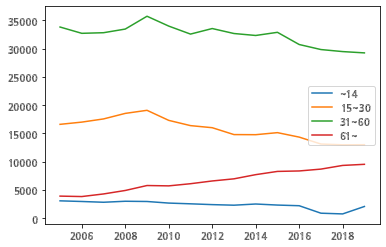

In [ ]:
plt.plot(accident_age_injured)
plt.legend(accident_age_injured.columns.tolist())

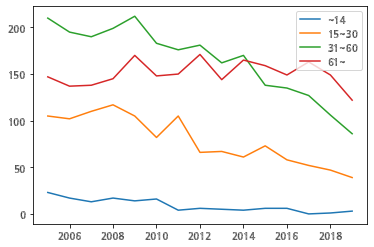

In [ ]:
plt.plot(accident_age_dead)
plt.legend(accident_age_dead.columns.tolist())

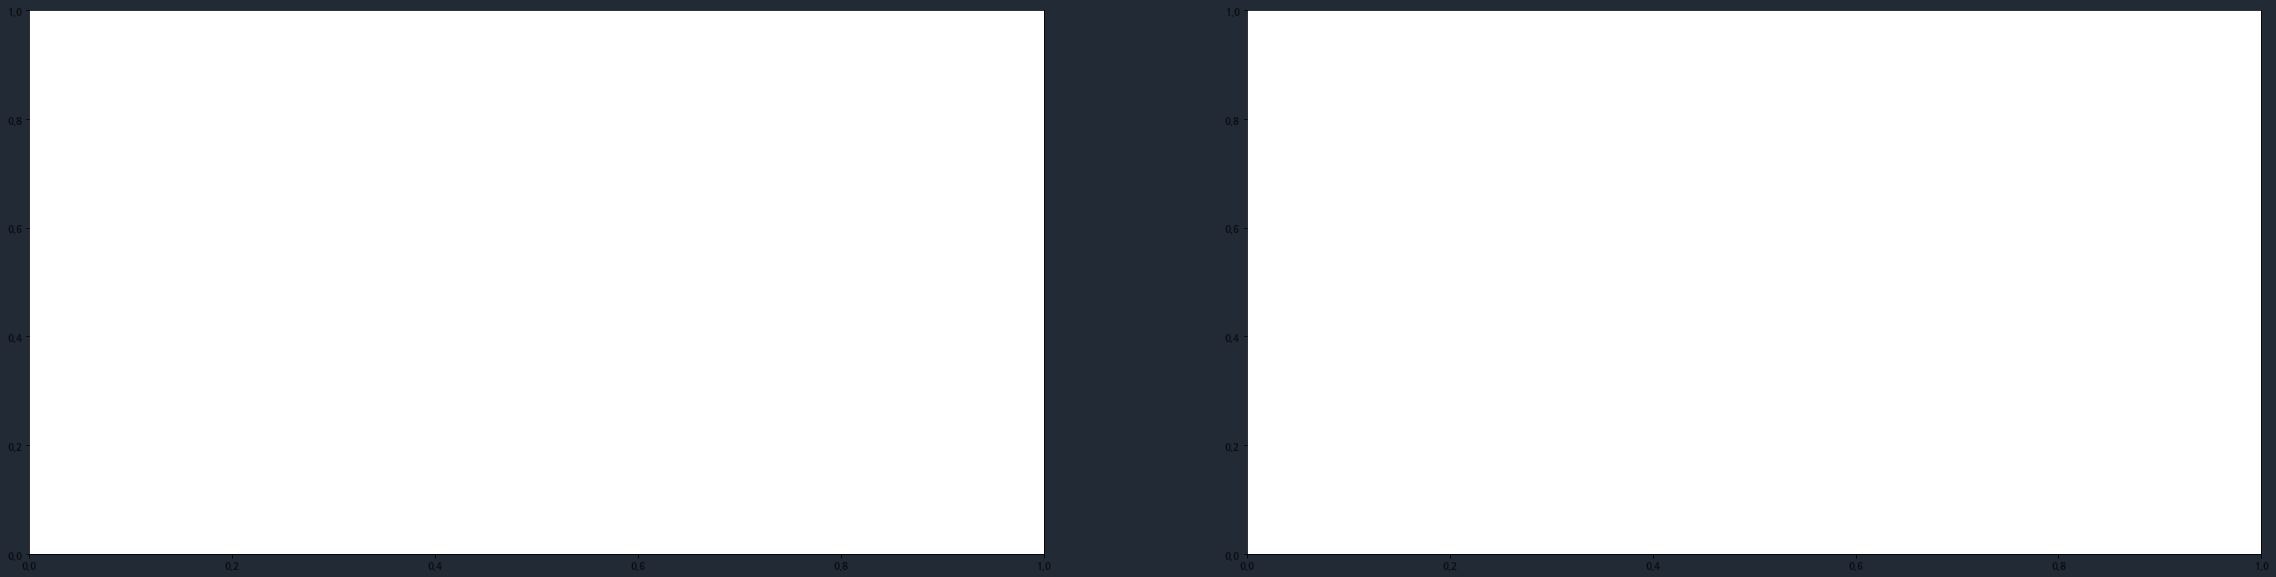

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(40, 10))

fig.patch.set_facecolor('#222A35')

In [ ]:
ax[0].fill_between(accident_age_injured.index, 0, accident_age_injured["~14"], label="~14", color="#fef0d9")
ax[0].fill_between(accident_age_injured.index, accident_age_injured["~14"], accident_age_injured["61~"], label="61~", color="#fdbb84")
ax[0].fill_between(accident_age_injured.index, accident_age_injured["61~"], accident_age_injured["15~30"], label="15~30", color="#ef6548")
ax[0].fill_between(accident_age_injured.index, accident_age_injured["15~30"], accident_age_injured["31~60"], label="31~60", color="#990000")

ax[0].set_title("부상자수", fontsize=15, color="white")
ax[0].spines["top"].set_visible(False)
ax[0].spines["bottom"].set_visible(False)
ax[0].spines["right"].set_visible(False)
ax[0].spines["left"].set_visible(False)
ax[0].tick_params(axis='x', colors='white')
ax[0].tick_params(axis='y', colors='white')
ax[0].set_facecolor("#222A35")

In [ ]:
ax[1].fill_between(accident_age_dead.index, 0, accident_age_dead["~14"], label="~14", color="#fef0d9")
ax[1].fill_between(accident_age_dead.index, accident_age_dead["~14"], accident_age_dead["15~30"], label="61~", color="#fdbb84")
ax[1].fill_between(accident_age_dead.index, accident_age_dead["15~30"], accident_age_dead["31~60"], label="15~30", color="#ef6548")
ax[1].fill_between(accident_age_dead.index, accident_age_dead["31~60"], accident_age_dead["61~"], label="31~60", color="#990000")

ax[1].set_title("사망자수", fontsize=15, color="white")
ax[1].spines["top"].set_visible(False)
ax[1].spines["bottom"].set_visible(False)
ax[1].spines["right"].set_visible(False)
ax[1].spines["left"].set_visible(False)
ax[1].tick_params(axis='x', colors='white')
ax[1].tick_params(axis='y', colors='white')
ax[1].legend(labelcolor="white", edgecolor="white", facecolor="None")
ax[1].set_facecolor("#222A35")

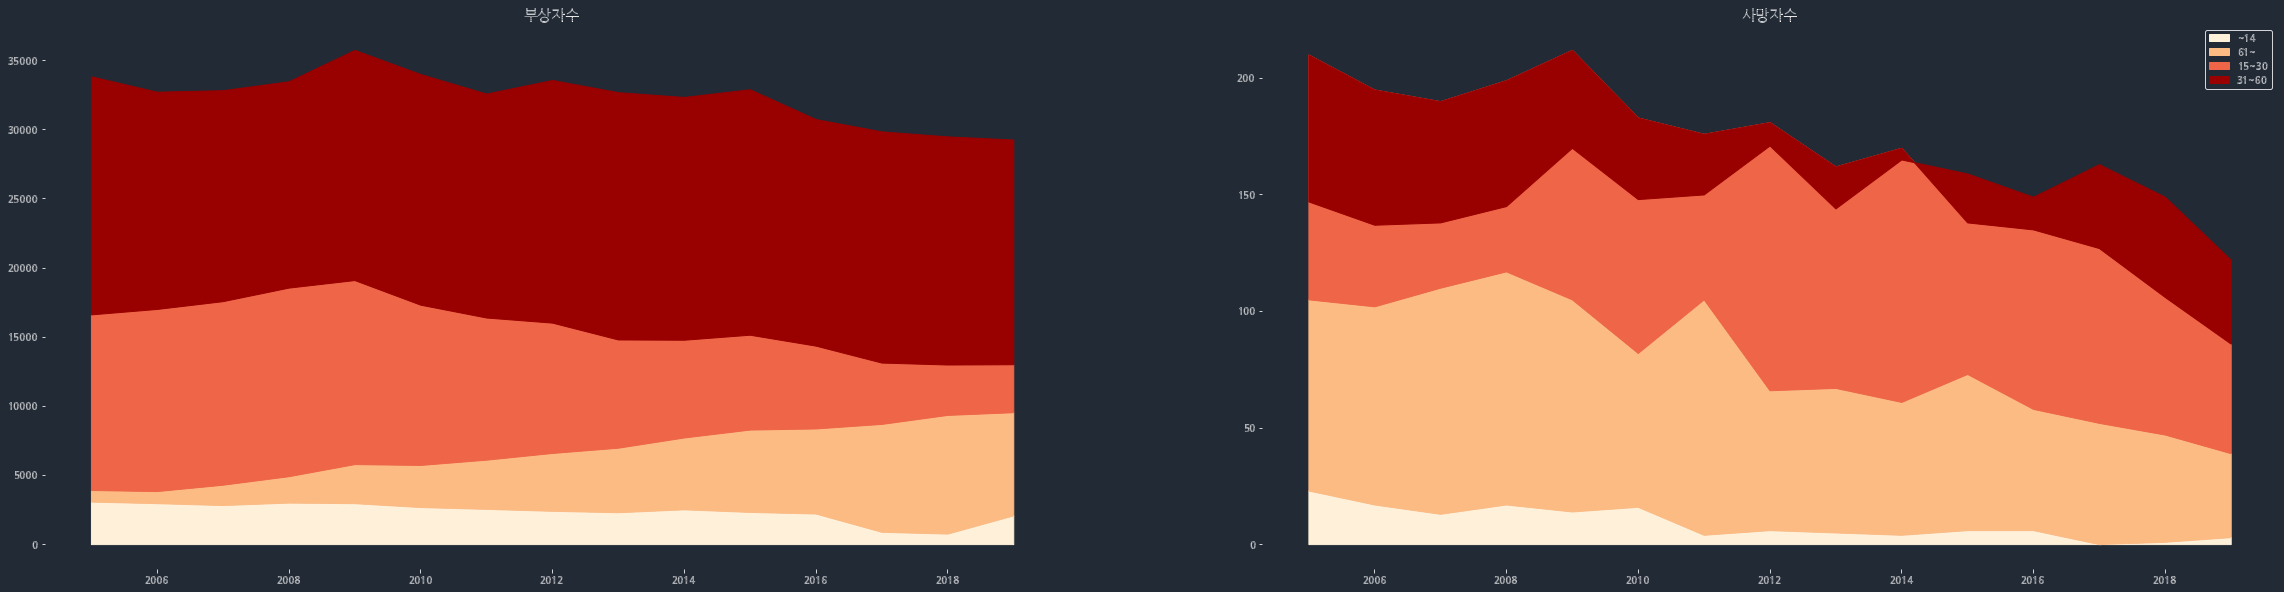

In [ ]:
fig

In [ ]:
fig.savefig('demo.png')

### accident causation

In [ ]:
accident_causation = pd.read_csv("accident_causation.csv", sep="\t", thousands=',', na_values='-', skiprows=1)

accident_causation.fillna(0, inplace=True)
accident_causation.set_index("기간", inplace=True)

In [ ]:
accident_causation["기타"] = accident_causation[["추락", "익사", "화재", "중독", "기타"]].sum(axis=1)

accident_causation_male = accident_causation[accident_causation["성별"] == "남자"]
accident_causation_female = accident_causation[accident_causation["성별"] == "여자"]
accident_causation_total = accident_causation[accident_causation["성별"] == "계"]

In [ ]:
accident_causation_male.head()

,성별,14세이하 인구,계,교통사고,추락,익사,화재,중독,기타,아동 10만명당 안전사고 사망자수
기간,,,,,,,,,,
2005,남자,905985,56,25.0,8.0,11.0,0.0,0.0,31.0,6.2
2006,남자,877134,49,16.0,6.0,7.0,3.0,1.0,33.0,5.6
2007,남자,847752,36,15.0,3.0,5.0,2.0,0.0,21.0,4.2
2008,남자,818458,41,18.0,4.0,11.0,0.0,0.0,23.0,5.0
2009,남자,788001,28,13.0,4.0,5.0,0.0,0.0,15.0,3.6


In [ ]:
cols = ["계", "교통사고", "기타"]

for col in cols:
    accident_causation_male[col] = (accident_causation_male[col] / accident_causation_total["14세이하 인구"]) * 1e6
    accident_causation_female[col] = (accident_causation_female[col] / accident_causation_total["14세이하 인구"]) * 1e6
    accident_causation_total[col] = (accident_causation_total[col] / accident_causation_total["14세이하 인구"]) * 1e6

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [ ]:
accident_causation["기타"] = accident_causation[["추락", "익사", "화재", "중독", "기타"]].sum(axis=1)

accident_causation_male = accident_causation[accident_causation["성별"] == "남자"]
accident_causation_female = accident_causation[accident_causation["성별"] == "여자"]
accident_causation_total = accident_causation[accident_causation["성별"] == "계"]

cols = ["계", "교통사고", "기타"]

for col in cols:
    accident_causation_male[col] = (accident_causation_male[col] / accident_causation_total["14세이하 인구"]) * 1e6
    accident_causation_female[col] = (accident_causation_female[col] / accident_causation_total["14세이하 인구"]) * 1e6
    accident_causation_total[col] = (accident_causation_total[col] / accident_causation_total["14세이하 인구"]) * 1e6

accident_causation_male = accident_causation_male.drop(["아동 10만명당 안전사고 사망자수", "14세이하 인구", "추락", "익사", "화재", "중독", "계"], axis=1)
accident_causation_female = accident_causation_female.drop(["아동 10만명당 안전사고 사망자수", "14세이하 인구", "추락", "익사", "화재", "중독", "계"], axis=1)
accident_causation_total = accident_causation_total.drop(["아동 10만명당 안전사고 사망자수", "14세이하 인구", "추락", "익사", "화재", "중독", "계"], axis=1)

accident_causation_male = accident_causation_male.drop("성별", axis=1)
accident_causation_female = accident_causation_female.drop("성별", axis=1)
accident_causation_total = accident_causation_total.drop("성별", axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [ ]:
accident_causation_male.head()

,교통사고,기타
기간,,
2005,14.446349,28.892699
2006,9.535451,29.798283
2007,9.237762,19.091374
2008,11.455045,24.182873
2009,8.567105,15.816195


In [ ]:
accident_causation_female.head()

,교통사고,기타
기간,,
2005,8.089956,10.979226
2006,8.939485,11.323348
2007,9.237762,8.621911
2008,5.091131,19.091742
2009,5.931073,9.885122


In [ ]:
accident_causation_total.head()

,교통사고,기타
기간,,
2005,22.536305,39.871924
2006,18.474936,41.121631
2007,18.475523,27.713285
2008,16.546177,43.274616
2009,14.498179,25.701316


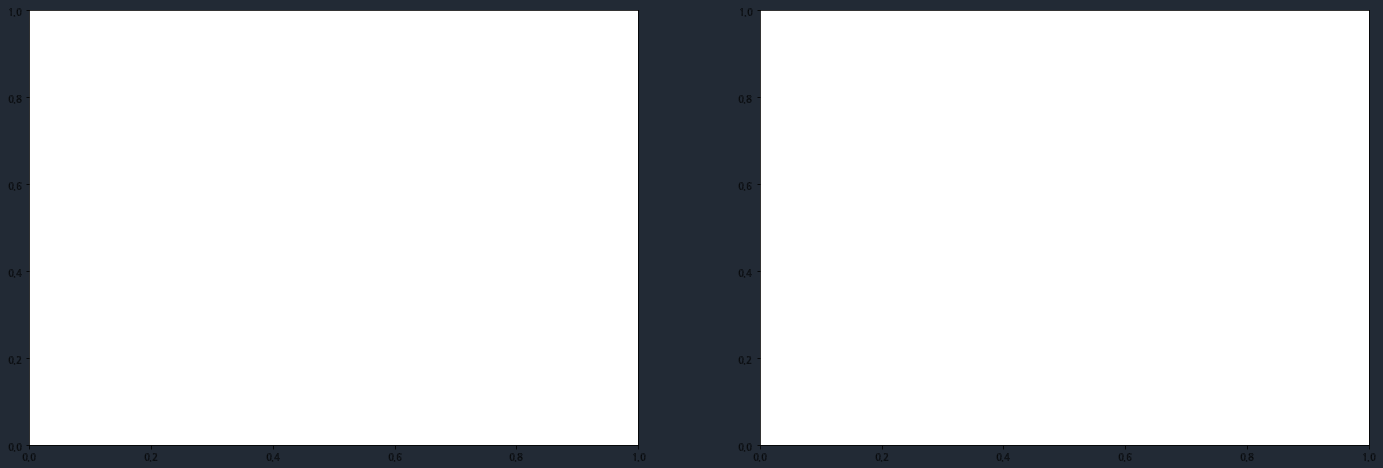

In [ ]:
## matplotlib

fig, ax = plt.subplots(1, 2, figsize = (24, 8))

fig.patch.set_facecolor("#222A35")

In [ ]:
ax[0].barh(accident_causation_female.index, accident_causation_female["교통사고"], color="#fc8d59", label="car")
ax[0].barh(accident_causation_female.index, accident_causation_female["기타"], left=accident_causation_female["교통사고"], color="#fef0d9", label="other")

ax[0].set_title("여자", color="white")
ax[0].set_xlim(0, 35)
ax[0].invert_xaxis()
ax[0].invert_yaxis()
ax[0].set_yticks([])
ax[0].spines["top"].set_visible(False)
ax[0].spines["bottom"].set_visible(False)
ax[0].spines["right"].set_visible(False)
ax[0].spines["left"].set_visible(False)
ax[0].tick_params(axis='x', colors='white')
ax[0].tick_params(axis='y', colors='white')
ax[0].legend(["교통사고", "기타"], labelcolor="white", edgecolor="white", facecolor="None", loc=3)
ax[0].set_facecolor("#222A35")

In [ ]:
ax[1].barh(accident_causation_male.index, accident_causation_male["기타"], left=accident_causation_male["교통사고"], color="#fef0d9", label="other")
ax[1].barh(accident_causation_male.index, accident_causation_male["교통사고"], color="#d7301f", label="car")

ax[1].invert_yaxis()
ax[1].set_xlim(0, 35)
ax[1].set_title("남자", color="white")
ax[1].spines["top"].set_visible(False)
ax[1].spines["bottom"].set_visible(False)
ax[1].spines["right"].set_visible(False)
ax[1].spines["left"].set_visible(False)
ax[1].tick_params(axis='x', colors='white')
ax[1].tick_params(axis='y', colors='white')
ax[1].legend(["교통사고", "기타"], labelcolor="white", edgecolor="white", facecolor="None")
ax[1].set_facecolor("#222A35")

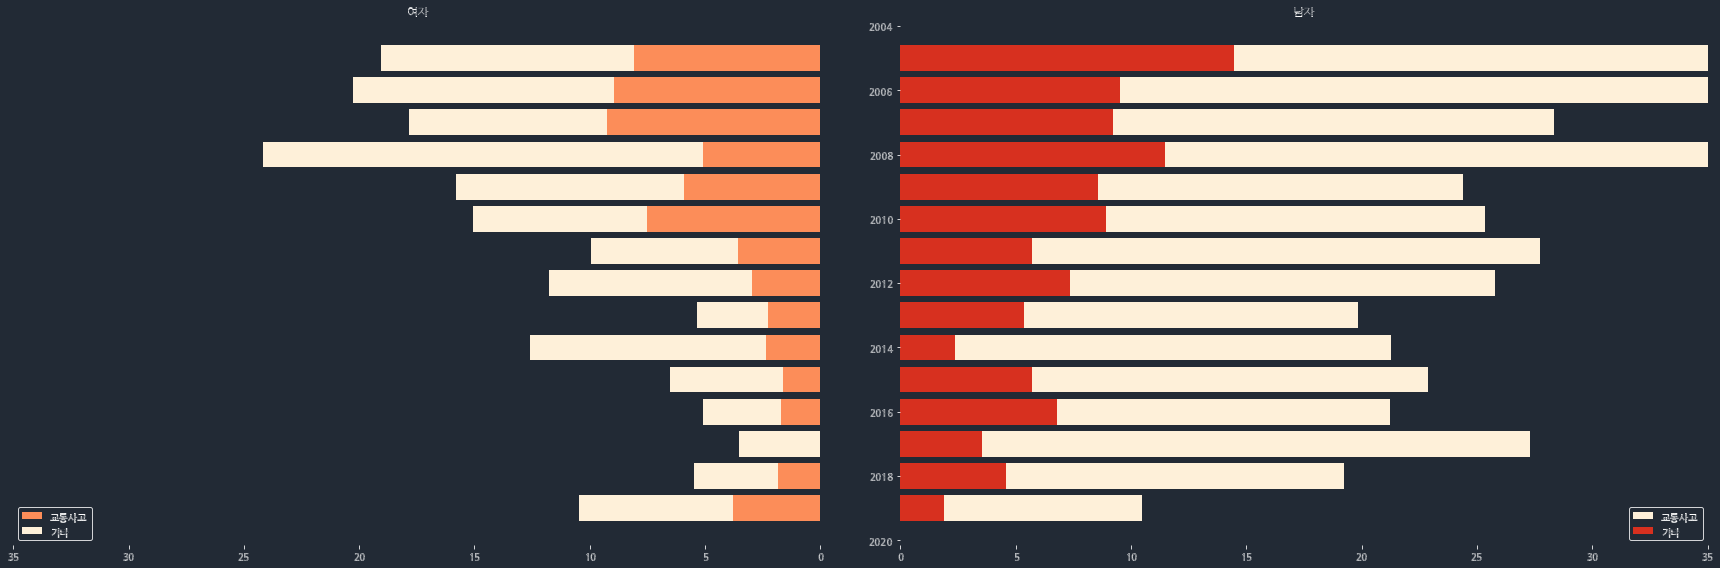

In [ ]:
fig.tight_layout()
fig.subplots_adjust(wspace=0.0992)
fig

In [ ]:
fig.savefig('demo2.png')

In [ ]:
for i in range(len(accident_causation_female.index)):
    for j in range(len(accident_causation_female.columns)):
        accident_causation_female.iloc[i, j] = float("%.1f" % (accident_causation_female.iloc[i, j]))

for i in range(len(accident_causation_male.index)):
    for j in range(len(accident_causation_male.columns)):
        accident_causation_male.iloc[i, j] = float("%.1f" % (accident_causation_male.iloc[i, j]))

In [ ]:
## plotly.graph_objects

import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Funnel(
    name="female other",
    y=accident_causation_female.index,
    x=accident_causation_female["기타"],
    textposition = "inside",
    textinfo="value",
    marker={ "color": ["#fef0d9"] * len(accident_causation_female.index) },
    connector={ "fillcolor" : "#cbc0ad" }
))

fig.add_trace(go.Funnel(
    name="female car",
    y=accident_causation_female.index,
    x=accident_causation_female["교통사고"],
    textposition = "inside",
    textinfo="value",
    marker={ "color": ["#ef6548"] * len(accident_causation_female.index) },
    connector={ "fillcolor" : "#bf6039" }
))

fig.add_trace(go.Funnel(
    name="male car",
    y=accident_causation_male.index,
    x=accident_causation_male["교통사고"],
    textposition = "inside",
    textinfo="value",
    marker={ "color": ["#990000"] * len(accident_causation_male.index) },
    connector={ "fillcolor" : "#7a0000" }
))

fig.add_trace(go.Funnel(
    name="male other",
    y=accident_causation_male.index,
    x=accident_causation_male["기타"],
    textposition = "inside",
    textinfo="value",
    marker={ "color": ["#fdd49e"] * len(accident_causation_male.index) },
    connector={ "fillcolor" : "#caa97e" }
))

# layout = go.Layout(
#     paper_bgcolor='rgba(0,0,0,0)',
#     plot_bgcolor='rgba(0,0,0,0)'
# )

# fig.update_layout(
#     paper_bgcolor='rgba(0,0,0,0)',
#     plot_bgcolor='rgba(0,0,0,0)',
#     font_color="white",
#     autosize=False,
#     width=800,
#     height=400)

fig.show()

### accident bicycle/ alcoholic/ senior

In [ ]:
# accident_bicycle

accident_bicycle = pd.read_csv("accident_bicycle.csv", sep='\t', thousands=',', na_values='-')
accident_bicycle.fillna(0, inplace=True)

In [ ]:
accident_bicycle_total = accident_bicycle[accident_bicycle["지역"] == "합계"]
accident_bicycle_total = accident_bicycle_total.drop("지역", axis=1)

In [ ]:
accident_bicycle_total

,기간,발생건수,사망자수,부상자수
0,2007,1862,25.0,1928
26,2008,2678,29.0,2805
52,2009,3055,44.0,3165
78,2010,2847,34.0,2933
104,2011,2861,19.0,2980
130,2012,3225,29.0,3342
156,2013,3250,26.0,3410
182,2014,4065,37.0,4295
208,2015,4062,27.0,4329
234,2016,3503,24.0,3718


In [ ]:
# accident_alcoholic

accident_alcoholic = pd.read_csv("accident_alcoholic.csv", sep='\t', thousands=',', na_values='-')
accident_alcoholic.fillna(0, inplace=True)

In [ ]:
accident_alcoholic_total = accident_alcoholic[accident_alcoholic["지역"] == "합계"]
accident_alcoholic_total = accident_alcoholic_total.drop("지역", axis=1)

accident_alcoholic_total.reset_index(inplace=True, drop=True)
accident_alcoholic_total = accident_alcoholic_total.drop([0, 1], axis=0)

In [ ]:
accident_alcoholic_total

,기간,발생건수,사망자수,부상자수
2,2007,3853,55.0,6843
3,2008,3481,59.0,6137
4,2009,3529,51.0,6433
5,2010,3910,62.0,7159
6,2011,3700,49.0,6817
7,2012,3819,41.0,7033
8,2013,3550,39.0,6535
9,2014,3361,30.0,6039
10,2015,3453,41.0,6205
11,2016,2874,41.0,5022


In [ ]:
# accident_children

accident_children = pd.read_csv("accident_children.csv", sep='\t', thousands=',', na_values='-', skiprows=1)
accident_children.fillna(0, inplace=True)

accident_children.columns = ["기간", "지역", "어린이 교통사고 발생건수", "어린이 교통사고 사망자수", "어린이 교통사고 부상자수",
                             "어린이 보호구역내 어린이 교통사고 발생건수", "어린이 보호구역내 어린이 교통사고 사망자수", "어린이 보호구역내 어린이 교통사고 부상자수",
                             "어린이 보행 사망자수", "어린이 보행 부상자수"]

In [ ]:
accident_children_total = accident_children[accident_children["지역"] == "합계"]
accident_children_total = accident_children_total.drop("지역", axis=1)

In [ ]:
accident_childwalk_total = accident_children_total[["기간", "어린이 보행 사망자수", "어린이 보행 부상자수"]]
accident_schoolzone_total = accident_children_total[["기간", "어린이 보호구역내 어린이 교통사고 발생건수", "어린이 보호구역내 어린이 교통사고 사망자수", "어린이 보호구역내 어린이 교통사고 부상자수"]]
accident_children_total = accident_children_total[["기간", "어린이 교통사고 발생건수", "어린이 교통사고 사망자수", "어린이 교통사고 부상자수"]]

In [ ]:
accident_childwalk_total

,기간,어린이 보행 사망자수,어린이 보행 부상자수
0,2007,12.0,1261
26,2008,11.0,1265
52,2009,9.0,1260
78,2010,11.0,1118
104,2011,4.0,1022
130,2012,3.0,791
156,2013,4.0,792
182,2014,1.0,830
208,2015,5.0,748
234,2016,6.0,669


In [ ]:
accident_schoolzone_total

,기간,어린이 보호구역내 어린이 교통사고 발생건수,어린이 보호구역내 어린이 교통사고 사망자수,어린이 보호구역내 어린이 교통사고 부상자수
0,2007,59.0,2.0,62.0
26,2008,67.0,0.0,76.0
52,2009,82.0,2.0,86.0
78,2010,113.0,3.0,116.0
104,2011,127.0,2.0,130.0
130,2012,95.0,2.0,95.0
156,2013,80.0,1.0,79.0
182,2014,96.0,1.0,100.0
208,2015,90.0,1.0,90.0
234,2016,96.0,2.0,101.0


In [ ]:
accident_children_total.head()

,기간,어린이 교통사고 발생건수,어린이 교통사고 사망자수,어린이 교통사고 부상자수
0,2007,2026,12.0,2323
26,2008,2139,16.0,2437
52,2009,2138,13.0,2421
78,2010,1930,14.0,2154
104,2011,1808,4.0,2045


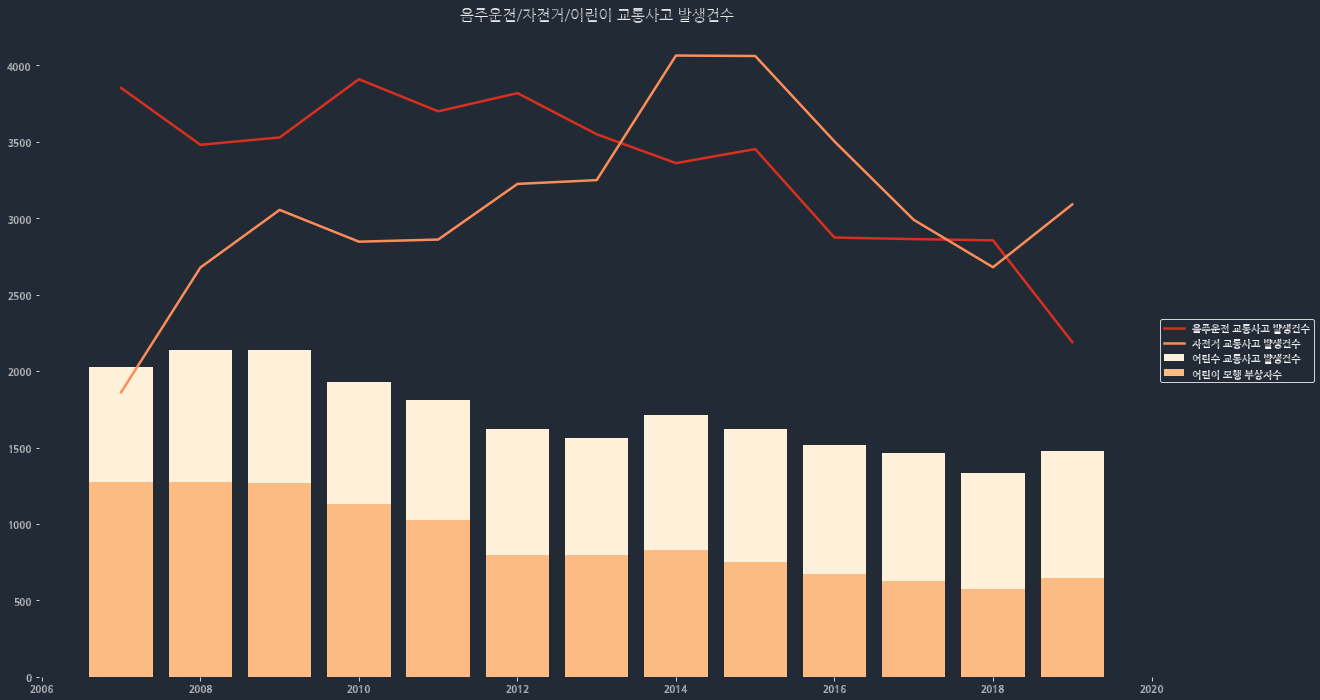

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(20, 12))
fig.patch.set_facecolor("#222A35")

ax.bar(accident_children_total["기간"], accident_children_total["어린이 교통사고 발생건수"], color="#fef0d9", label="어린수 교통사고 발생건수")
ax.bar(accident_childwalk_total["기간"], accident_childwalk_total["어린이 보행 사망자수"] + accident_childwalk_total["어린이 보행 부상자수"], color="#fdbb84", label="어린이 보행 부상자수")
ax.plot(accident_alcoholic_total["기간"], accident_alcoholic_total["발생건수"], color="#d7301f", label="음주운전 교통사고 발생건수", linewidth=2.5)
ax.plot(accident_bicycle_total["기간"], accident_bicycle_total["발생건수"], color="#fc8d59", label="자전거 교통사고 발생건수", linewidth=2.5)

ax.set_title("음주운전/자전거/어린이 교통사고 발생건수", fontsize=15, color="white")
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.legend(labelcolor="white", edgecolor="white", facecolor="None", loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_facecolor("#222A35")

In [ ]:
fig.savefig('demo3.png', bbox_inches='tight')

# lgd = ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5,-0.1))
# text = ax.text(-0.2,1.05, "Aribitrary text", transform=ax.transAxes)
# ax.set_title("Trigonometry")
# ax.grid('on')
# fig.savefig('samplefigure', bbox_extra_artists=(lgd,text), bbox_inches='tight')

## accident children/alcoholic/bicycle

In [ ]:
# accident_children

accident_children = pd.read_csv("accident_children.csv", sep='\t', thousands=',', na_values='-', skiprows=1)
accident_children.fillna(0, inplace=True)

accident_children.columns = ["기간", "지역", "어린이 교통사고 발생건수", "어린이 교통사고 사망자수", "어린이 교통사고 부상자수",
                             "어린이 보호구역내 어린이 교통사고 발생건수", "어린이 보호구역내 어린이 교통사고 사망자수", "어린이 보호구역내 어린이 교통사고 부상자수",
                             "어린이 보행 사망자수", "어린이 보행 부상자수"]

In [ ]:
accident_children_2019 = accident_children[accident_children["기간"] == 2019]
accident_children_2019 = accident_children_2019[["기간", "지역", "어린이 교통사고 발생건수", "어린이 교통사고 사망자수", "어린이 교통사고 부상자수"]]
accident_children_2019.columns = ["기간", "지역", "발생건수", "사망자수", "부상자수"]

accident_children_2019 = accident_children_2019.drop("기간", axis=1)
accident_children_2019.sort_values(by="지역", ascending=True, inplace=True)
accident_children_2019.set_index("지역", inplace=True)

In [ ]:
accident_children_total = accident_children.groupby("지역").agg(sum)
accident_children_total = accident_children_total.drop("기간", axis=1)
accident_children_total = accident_children_total[["어린이 교통사고 발생건수", "어린이 교통사고 사망자수", "어린이 교통사고 부상자수"]]
accident_children_total.columns = ["발생건수", "사망자수", "부상자수"]

In [ ]:
accident_children_2019.head()

,발생건수,사망자수,부상자수
지역,,,
강남구,107,0.0,126
강동구,69,0.0,87
강북구,59,0.0,69
강서구,90,1.0,110
관악구,37,0.0,45


In [ ]:
accident_children_total.head()

,발생건수,사망자수,부상자수
지역,,,
강남구,1168,4.0,1387
강동구,1125,5.0,1274
강북구,770,2.0,873
강서구,1153,9.0,1307
관악구,809,8.0,929


In [ ]:
#accident senior

accident_senior = pd.read_csv("accident_senior.csv", sep='\t', thousands=',', na_values='-', skiprows=1)
accident_senior.fillna(0, inplace=True)

accident_senior.columns = ["기간", "지역", "노인 교통사고 발생건수", "노인 교통사고 사망자수", "노인 교통사고 부상자수",
                           "노인운전자 교통사고 사망자수", "노인운전자 교통사고 부상자수", "노인운전자 교통사고 부상자수",
                           "노인 보행자 사망자수", "노인 보행자 부상자수"]

In [ ]:
accident_senior_2019 = accident_senior[accident_senior["기간"] == 2019]
accident_senior_2019 = accident_senior_2019[["기간", "지역", "노인 교통사고 발생건수", "노인 교통사고 사망자수", "노인 교통사고 부상자수"]]
accident_senior_2019.columns = ["기간", "지역", "발생건수", "사망자수", "부상자수"]

accident_senior_2019 = accident_senior_2019.drop("기간", axis=1)
accident_senior_2019.sort_values(by="지역", ascending=True, inplace=True)
accident_senior_2019.set_index("지역", inplace=True)

In [ ]:
accident_senior_total = accident_senior.groupby("지역").agg(sum)
accident_senior_total = accident_senior_total.drop("기간", axis=1)

accident_senior_total = accident_senior_total[["노인 교통사고 발생건수", "노인 교통사고 사망자수", "노인 교통사고 부상자수"]]
accident_senior_total.columns = ["발생건수", "사망자수", "부상자수"]

In [ ]:
accident_senior_2019.head()

,발생건수,사망자수,부상자수
지역,,,
강남구,352,6.0,366
강동구,286,5.0,293
강북구,217,3.0,226
강서구,276,8.0,283
관악구,194,5.0,202


In [ ]:
accident_senior_total.head()

,발생건수,사망자수,부상자수
지역,,,
강남구,3115,57.0,3246
강동구,2339,70.0,2412
강북구,2222,66.0,2265
강서구,2576,76.0,2651
관악구,2304,77.0,2322


In [ ]:
# seoul_population

seoul_population = pd.read_csv("seoul_population.csv", sep='\t', thousands=',', na_values='-', skiprows=2)
seoul_population.fillna(0, inplace=True)

In [ ]:
seoul_population = seoul_population[["기간", "자치구", "계"]]
seoul_population.columns = ["기간", "지역", "인구수"]

In [ ]:
seoul_population_2019 = seoul_population[seoul_population["기간"] == 2019]
seoul_population_2019 = seoul_population_2019.drop("기간", axis=1)
seoul_population_2019.sort_values(by="지역", ascending=True, inplace=True)
seoul_population_2019.set_index("지역", inplace=True)

In [ ]:
seoul_population_total = seoul_population.groupby("지역").agg(sum)
seoul_population_total = seoul_population_total.drop("기간", axis=1)
seoul_population_total.sort_values(by="지역", ascending=True, inplace=True)

In [ ]:
seoul_population_2019.head()

,인구수
지역,
강남구,550209
강동구,440390
강북구,317695
강서구,598273
관악구,517334


In [ ]:
seoul_population_total.head()

,인구수
지역,
강남구,8502014
강동구,7048461
강북구,5104639
강서구,8751423
관악구,8049815


In [ ]:
# seoul accident

seoul_accident = pd.read_csv("seoul_accident.csv", sep='\t', thousands=',', na_values='-')
seoul_accident.fillna(0, inplace=True)

seoul_accident = seoul_accident[["기간", "지역", "발생건수", "사망자수", "부상자수"]]

In [ ]:
seoul_accident.tail()

,기간,지역,발생건수,사망자수,부상자수
385,2019,관악구,1363,10,1755
386,2019,서초구,2418,14,3530
387,2019,강남구,3722,14,5182
388,2019,송파구,2892,13,4003
389,2019,강동구,1414,11,1910


In [ ]:
seoul_accident_2019 = seoul_accident[seoul_accident["기간"] == 2019]
seoul_accident_2019 = seoul_accident_2019.drop("기간", axis=1)
seoul_accident_2019.sort_values(by="지역", ascending=True, inplace=True)
seoul_accident_2019.set_index("지역", inplace=True)

In [ ]:
seoul_accident_total = seoul_accident.groupby("지역").agg(sum)
seoul_accident_total = seoul_accident_total.drop("기간", axis=1)
seoul_accident_total.sort_values(by="지역", ascending=True, inplace=True)

In [ ]:
seoul_accident_2019.head()

,발생건수,사망자수,부상자수
지역,,,
강남구,3722,14,5182
강동구,1414,11,1910
강북구,1277,7,1706
강서구,1829,20,2491
관악구,1363,10,1755


In [ ]:
seoul_accident_total.head()

,발생건수,사망자수,부상자수
지역,,,
강남구,53250,372,77171
강동구,21529,242,29980
강북구,18708,182,25685
강서구,26883,287,38208
관악구,24797,237,34097


In [ ]:
cols = ["발생건수", "부상자수", "사망자수"]

for col in cols:
    accident_bicycle_2019[col] = accident_bicycle_2019[col] / seoul_population_2019["인구수"] * 1e5
    accident_alcoholic_2019[col] = accident_alcoholic_2019[col] / seoul_population_2019["인구수"] * 1e5
    accident_children_2019[col] = accident_children_2019[col] / seoul_population_2019["인구수"] * 1e5
    accident_senior_2019[col] = accident_senior_2019[col] / seoul_population_2019["인구수"] * 1e5

    accident_bicycle_total[col] = accident_bicycle_total[col] / seoul_population_total["인구수"] * 1e5
    accident_alcoholic_total[col] = accident_alcoholic_total[col] / seoul_population_total["인구수"] * 1e5
    accident_children_total[col] = accident_children_total[col] / seoul_population_total["인구수"] * 1e5
    accident_senior_total[col] = accident_senior_total[col] / seoul_population_total["인구수"] * 1e5

In [ ]:
accident_children_2019.sort_values(by="발생건수", ascending=False, inplace=True)
accident_children_2019.head(10)

,발생건수,사망자수,부상자수
지역,,,
송파구,19.919706,0.000000,23.288480
강남구,19.447156,0.000000,22.900389
강북구,18.571271,0.000000,21.718944
영등포구,18.454510,0.000000,22.943444
구로구,18.435445,0.000000,21.394220
중구,17.583963,0.000000,21.979954
양천구,17.521659,0.432634,20.333777
중랑구,16.168189,0.000000,20.396792
서초구,15.858168,0.000000,20.454739


In [ ]:
accident_senior_2019.sort_values(by="발생건수", ascending=False, inplace=True)
accident_senior_2019.head(10)

,발생건수,사망자수,부상자수
지역,,,
종로구,113.672167,1.235567,124.174487
중구,110.632437,2.197995,112.097767
동대문구,86.771362,1.377323,89.250543
영등포구,85.040375,0.498771,93.519474
중랑구,68.652618,1.741190,73.378704
강북구,68.304506,0.944302,71.137412
서대문구,65.290512,3.403771,67.147114
서초구,65.271301,1.149143,70.787186
강동구,64.942437,1.135357,66.531938


In [ ]:
accident_children_total.sort_values(by="발생건수", ascending=False).head(10)

,발생건수,사망자수,부상자수
지역,,,
중랑구,18.738756,0.047320,21.404454
송파구,17.568494,0.020021,20.391466
영등포구,16.944703,0.078593,20.371369
종로구,16.629319,0.039128,19.837800
중구,16.617123,0.000000,19.629584
강동구,15.960931,0.070937,18.074868
양천구,15.094138,0.054004,17.105790
금천구,15.090160,0.153981,17.168906
강북구,15.084318,0.039180,17.102091


In [ ]:
accident_senior_total.sort_values(by="발생건수", ascending=False).head(10)

,발생건수,사망자수,부상자수
지역,,,
중구,87.458542,2.235052,89.839358
종로구,76.416613,2.112902,78.920792
동대문구,60.540064,1.702856,61.214111
영등포구,51.572887,1.556146,53.034721
용산구,45.916891,1.124495,47.228802
강북구,43.529033,1.292942,44.371404
중랑구,42.998188,0.946402,44.528205
서대문구,39.896258,1.581437,40.717004
성북구,38.696294,1.151341,39.426413


In [ ]:
ls

accident_age.csv        accident_children.csv  to_csv/
accident_alcoholic.csv  accident_senior.csv    week1_data.ipynb
accident_bicycle.csv    seoul_accident.csv     week2_data.ipynb
accident_causation.csv  seoul_population.csv


### pydeck map visualtion

In [ ]:
!pip install pydeck
!pip install geopandas

In [ ]:
import pydeck as pdk
import numpy as np
import pandas as pd
import geopandas as gpd

In [ ]:
!%env MAPBOX_API_KEY = "pk.eyJ1IjoicnhkY3hkcm5pbmUiLCJhIjoiY2toaXN1NmhkMXA5aTJ0cGpwcmQ3djVyYSJ9.hg-MHbDx-nDif1aO--qIoA"

/bin/bash: line 0: fg: no job control


In [ ]:
cd /content/drive/My Drive/Colab Notebooks/uos bigdata 2020/to_csv

/content/drive/My Drive/Colab Notebooks/uos bigdata 2020/to_csv


In [ ]:
geo_data = gpd.read_file('test.geojson')
geo_data.head()

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry
0,11110,Jongno-gu,종로구,"MULTIPOLYGON (((127.00864 37.58047, 127.00871 ..."
1,11140,Jung-gu,중구,"MULTIPOLYGON (((127.02314 37.57196, 127.02336 ..."
2,11170,Yongsan-gu,용산구,"MULTIPOLYGON (((126.96918 37.55566, 126.96917 ..."
3,11200,Seongdong-gu,성동구,"MULTIPOLYGON (((127.04341 37.57234, 127.04524 ..."
4,11215,Gwangjin-gu,광진구,"MULTIPOLYGON (((127.10166 37.57240, 127.10224 ..."


In [ ]:
def multipolygon_to_coordinates(x):
    lon, lat = x[0].exterior.xy
    return [[x, y] for x, y in zip(lon, lat)]
    
geo_data['coordinates'] = geo_data['geometry'].apply(multipolygon_to_coordinates)
del geo_data['geometry']

geo_data = pd.DataFrame(geo_data)

In [ ]:
children = pd.read_csv("accident_children_total.csv")
senior = pd.read_csv("accident_senior_total.csv")

In [ ]:
children.drop(np.where(children["지역"] == "합계")[0][0], axis=0, inplace=True)
senior.drop(np.where(senior["지역"] == "합계")[0][0], axis=0, inplace=True)

children.rename(columns = {"지역" : "SIG_KOR_NM"}, inplace = True)
senior.rename(columns = {"지역" : "SIG_KOR_NM"}, inplace = True)

In [ ]:
children = pd.merge(geo_data, children, on="SIG_KOR_NM")
senior = pd.merge(geo_data, senior, on="SIG_KOR_NM")

In [ ]:
children["normalized_value"] = children["발생건수"] / children["발생건수"].max()

In [ ]:
# Make layer
layer = pdk.Layer(
    'PolygonLayer', # 사용할 Layer 타입
    children, # 시각화에 쓰일 데이터프레임
    get_polygon='coordinates', # geometry 정보를 담고있는 컬럼 이름
    get_fill_color='[0, 255*normalized_value, 0]', # 각 데이터 별 rgb 또는 rgba 값 (0~255)
    pickable=True, # 지도와 interactive 한 동작 on
    auto_highlight=True # 마우스 오버(hover) 시 박스 출력
)

# Set the viewport location
center = [126.986, 37.565]
view_state = pdk.ViewState(
    longitude=center[0],
    latitude=center[1],
    zoom=10)

# Render
r = pdk.Deck(layers=[layer], initial_view_state=view_state)
r.show()

/usr/local/lib/python3.6/dist-packages/pydeck/bindings/deck.py:107: UserWarning: Mapbox API key is not set. This may impact available features of pydeck.
  UserWarning,


DeckGLWidget(google_maps_key=None, json_input='{"initialViewState": {"latitude": 37.565, "longitude": 126.986,…

## schoolzone

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator


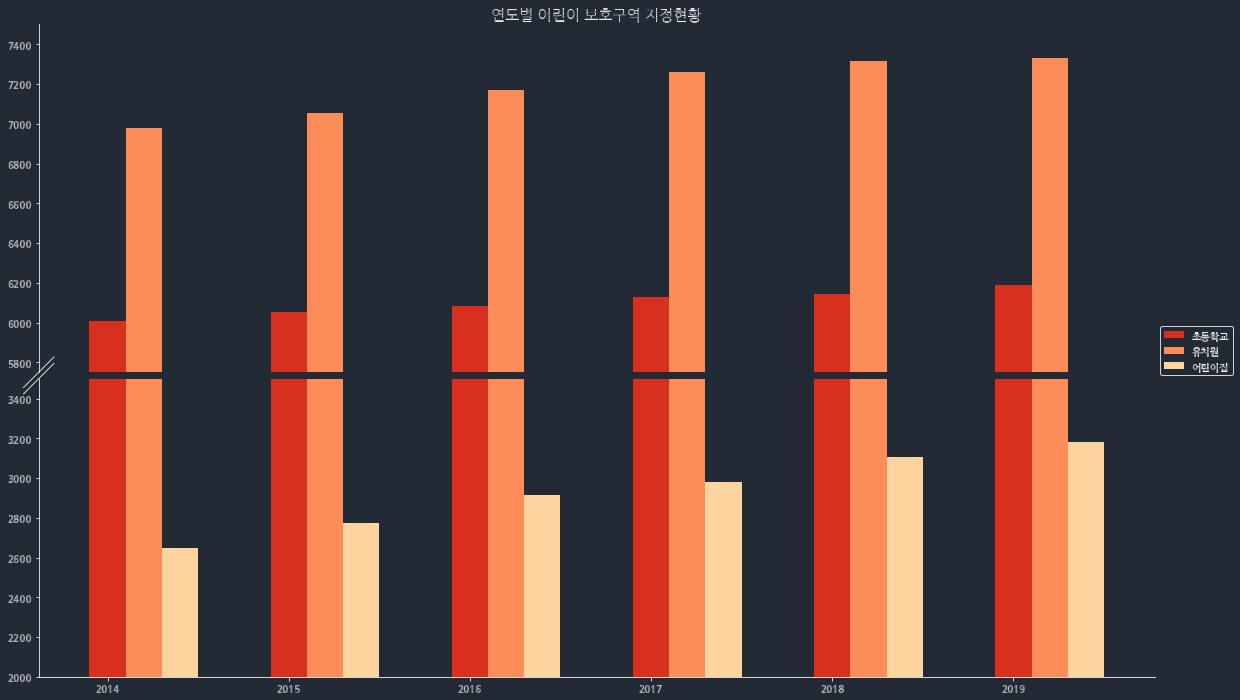

In [149]:
import numpy as np
from brokenaxes import brokenaxes

schoolzone = pd.read_csv("stats_161601.xls.csv", thousands=',')
schoolzone = schoolzone.transpose()
schoolzone.columns = schoolzone.iloc[0, :]
schoolzone = schoolzone.iloc[1:, :]
schoolzone.reset_index(inplace=True)

sub_category = ["초등학교",  "유치원",  "어린이집"]
colors = ["#d7301f", "#fc8d59", "#fdd49e"]              
between_bar_padding = 0.6
within_bar_padding = 1

fig = plt.figure(figsize=(20, 12))
fig.set_facecolor('#222A35')
bax = brokenaxes(ylims=((2000, 3500), (5750, 7500)), hspace=.02, diag_color='w')

tick_label = list(schoolzone["index"].values)
tick_coord = np.arange(len(tick_label))
width = (1 / len(sub_category)) * between_bar_padding

for i in range(len(sub_category)):
    bax.bar(tick_coord + width * i, schoolzone[sub_category[i]], width * within_bar_padding, label=sub_category[i], color=colors[i])
    

bax.set_title("연도별 어린이 보호구역 지정현황", fontsize=15, color="white")
bax.set_facecolor("#222A35")

bax.axs[0].spines["left"].set_color('white')
bax.axs[1].spines["left"].set_color('white')
bax.axs[1].spines["bottom"].set_color('white')

bax.axs[0].tick_params(axis='x', colors='white')
bax.axs[0].tick_params(axis='y', colors='white')
bax.axs[1].tick_params(axis='x', colors='white')
bax.axs[1].tick_params(axis='y', colors='white')

bax.axs[1].set_xticklabels([''] + tick_label)

bax.legend(labelcolor="white", edgecolor="white", facecolor="None", loc='center left', bbox_to_anchor=(1, 0.5))
fig.savefig('demo4.png', bbox_inches='tight')